Importo lo que necesito del codigo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

drive.mount('/content/drive')

file_name='/content/drive/My Drive/Levels_Fyi_Salary_Data.csv' 

df=pd.read_csv(file_name)

Mounted at /content/drive


Acondiciono los datos

In [ ]:
#Me quedo solo con las columnas de compañia, salario base, origen etnico y años.

df_eth=df[['timestamp','company','basesalary','Race','Education','yearsatcompany','title']]

#Paso a minusculas algunas columnas

df_eth['title']=df_eth['title'].str.lower()

df_eth['Education']=df_eth['Education'].str.lower()

df_eth['company']=df_eth['company'].str.lower()

#Dropeo los Nans.

df_eth=df_eth[df_eth['Race'].str.contains('nan')==False]

df_eth=df_eth[df_eth['Education'].str.contains('nan')==False]

df_eth=df_eth[df_eth['Education'].str.contains('nan')==False]

df_eth.reset_index(drop=True,inplace=True)

#De la columna del tiempo me interesan solo los años asique creo una funcion para estandarizarla.
#Donde 'df' es el dataset, 'col' el nombre de la columna, 'wi' la palabra a reemplazar.
def replacer(df,col,w1,w2,w3):
    for i in df.index:
        if w1 in df.loc[i,col]:
            df.loc[i,col]=w1
        if w2 in df.loc[i,col]:
            df.loc[i,col]=w2
        if w3 in df.loc[i,col]:
            df.loc[i,col]=w3
    return df

df_eth=replacer(df_eth,'timestamp','2019','2020','2021')

#De la columna de compañias me interesan unicamente las que tienen por lo menos datos de mas de una cantidad T de empleados, por lo tanto la filtro con la siguiente funcion.
#Donde 'df' es el dataset, 'col' la columna a filtrar, 'T' el umbral con los datos.
def remover(df,col,T):
    t_dict=df_eth['company'].value_counts().to_dict()
    f_dict=df_eth['company'].value_counts().to_dict()
    for key, values in t_dict.items():
        if values <= T:
            del f_dict[key]
    df=df.loc[df[col].isin(list(f_dict.keys()))]
    return df
    
df_eth=remover(df_eth,'company',200)

#Armo un dataset con el salario clasificado en 3 grupos 
#Donde 'df' es el dataset, 'col' la columna a filtrar, 'Ti' los parametros que limitan los grupos de salarios.
def filter_s(df,col,T1,T2,T3,T4):
  df1=df.copy()
  for i in df1.index:
    if T1<=int(df1.loc[i,col])<T2:
        df1.loc[i,col]='A'
    elif T2<=int(df1.loc[i,col])<T3:
        df1.loc[i,col]='B'
    elif T3<=int(df1.loc[i,col])<=T4:
        df1.loc[i,col]='C'
  return df1


df_eth_s=filter_s(df_eth,'basesalary',9000,30000,140000,600000)
print(df_eth_s)
#Borro Two Or More

df_eth=df_eth[df_eth['Race'].str.contains('Two Or More')==False]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

      timestamp    company basesalary         Race          Education  \
0          2020     google          C        Asian                phd   
1          2020  microsoft          B  Two Or More  bachelor's degree   
2          2020     google          C        Asian  bachelor's degree   
3          2020  microsoft          C        Asian    master's degree   
5          2020     amazon          C        Asian  bachelor's degree   
...         ...        ...        ...          ...                ...   
21673      2020   facebook          C        White  bachelor's degree   
21676      2021   facebook          C        Asian  bachelor's degree   
21677      2021     google          C        Asian    master's degree   
21679      2021   facebook          C        Black    master's degree   
21680      2021   facebook          C        Asian    master's degree   

       yearsatcompany                         title  
0                 5.0             software engineer  
1              

In [ ]:
print(df_eth['company'].value_counts())

amazon            2508
microsoft         1580
google            1268
facebook           971
apple              586
oracle             398
ibm                351
intel              323
cisco              312
salesforce         290
capital one        267
vmware             244
jpmorgan chase     231
deloitte           201
Name: company, dtype: int64


Calculo el porcentaje total de etnias en el mundo laboral IT y el porcentaje por etnia en cada compañia.

In [ ]:
#Calculo el total de empleados
t_emp2=len(df_eth['Race'])

def eth_total_employes(df,et):
  df=df[df['Race'].str.contains(et)!=False].copy()
  t=df['Race'].value_counts().to_dict()
  k=t[et]
  return k

#Defino la funcion para calcular el total de empleados por cada etnia
def employes(df,col,comps):
  if comps==[]:
    pass
  else: 
    df=df.loc[df[col].isin(comps)].copy()
  t_emp=df[col].value_counts().to_dict()
  return t_emp

def eth_employes(df,col,et,comps):
    if comps==[]:
      pass
    else: 
      df=df.loc[df[col].isin(comps)].copy()
    df=df[df['Race'].str.contains(et)!=False]
    #Cuento la cantidad por empresa.
    et_employes=df['Race'].value_counts()
    return et_employes

#Defino la función para calcular el porcentaje de empleados por compañia.

#Donde 'et' la etnia que quiero analizar y t_emp el total de empleados.
def percentage(df,et,t_emp,comps):
  if comps==[]: 
    pass
  else: 
    df=df.loc[df['company'].isin(comps)].copy()
  eth_dict={} #Diccionario donde voy a guardar el porcentaje. 
  df_as=df[df['Race'].str.contains(et)!=False] #Separo el dataset por etnias
  etv=df_as['company'].value_counts()
  for i in etv.index:
      p=round((etv[i]/t_emp[i])*100,0)
      eth_dict[i]=p
  return eth_dict

#Aplico

comps=['google','ibm','microsoft','apple','amazon']

t_emp=employes(df_eth,'company',comps)
#Asiatico
t_as_emp=eth_employes(df_eth,'company','Asian',comps)
p_as_emp=percentage(df_eth,'Asian',t_emp,comps)
#Hispano
t_hi_emp=eth_employes(df_eth,'company','Hispanic',comps)
p_hi_emp=percentage(df_eth,'Hispanic',t_emp,comps)
#¿Americano? 
t_wh_emp=eth_employes(df_eth,'company','White',comps)
p_wh_emp=percentage(df_eth,'White',t_emp,comps)
#Afroamericano
t_bl_emp=eth_employes(df_eth,'company','Black',comps)
p_bl_emp=percentage(df_eth,'Black',t_emp,comps)
#Mestizo
#t_hb_emp=eth_employes(df_eth,'company','Two Or More',comps)
#p_hb_emp=percentage(df_eth,'Two Or More',t_emp,comps)

#Creo un dataframe con la info obtenida
companies=[]
for i in p_as_emp.keys():
  companies.append(i)
for i in p_hi_emp.keys():
  companies.append(i)
for i in p_wh_emp.keys():
  companies.append(i)
for i in p_bl_emp.keys():
  companies.append(i)


percentage=[]
for i in p_as_emp.values():
  percentage.append(i)
for i in p_hi_emp.values():
  percentage.append(i)
for i in p_wh_emp.values():
  percentage.append(i)
for i in p_bl_emp.values():
  percentage.append(i)

et=[]
for i in range(len(p_as_emp.keys())):
  et.append('Asiático')
for i in range(len(p_hi_emp.keys())):
  et.append('Hispano')
for i in range(len(p_wh_emp.keys())):
  et.append('Norteamericano')
for i in range(len(p_bl_emp.keys())):
  et.append('Afroamericano')

data={'compañias':companies,'Porcentaje':percentage,'Etnia':et}

df_per=pd.DataFrame(data)

df_per.sort_values('Porcentaje',ascending=False,inplace=True)

#Estudio los casos totales

#Asiaticos
total_as=eth_total_employes(df_eth,'Asian')
#Hispanos
total_hi=eth_total_employes(df_eth,'Hispanic')
#Americanos
total_am=eth_total_employes(df_eth,'White')
#Afroamericanos
total_af=eth_total_employes(df_eth,'Black')
#Mestizos
#total_hb=eth_total_employes(df_eth,'Two Or More')



total=[100*total_as/t_emp2,100*total_hi/t_emp2,100*total_am/t_emp2,100*total_af/t_emp2]

total.sort(reverse=True)

#Realizo los calculos para los grupos salariales
#Donde 'df' es el datasetm, 'col' la columna a filtrar(salario), 'w1' la palabra a filtrar(en este caso la etnia),  A,B y C los nombres de los grupos salariales.
def filter1(df,col,w):
  #Filtro el dataset por etnia
  df=df[df['Race'].str.contains(w)!=False]
  #Filtro por sueldo. 
  A=df[df[col].str.contains('A')!=False]
  B=df[df[col].str.contains('B')!=False]
  C=df[df[col].str.contains('C')!=False]
  x1=A['basesalary'].value_counts().to_dict()
  x2=B['basesalary'].value_counts().to_dict()
  x3=C['basesalary'].value_counts().to_dict()
  try:
    A1=x1['A']
  except:
    A1=0
  try:
    B1=x2['B']
  except:
    B1=0
  try:
    C1=x3['C']
  except:
    C1=0
  t=(A1+B1+C1)  #Calculo el total para obtener el resultado en porcentaje.
  l=[] #Lista donde voy a guardar la cantidad por cada grupo salarial.
  l.append((A1/t)*100)
  l.append((B1/t)*100)
  l.append((C1/t)*100)
  return l

#Aplico para cada etnia
#Asiatico
s_as=filter1(df_eth_s,'basesalary','Asian')
#Hispano
s_hi=filter1(df_eth_s,'basesalary','Hispanic')
#Americano
s_wh=filter1(df_eth_s,'basesalary','White')
#Afroamericano
s_bl=filter1(df_eth_s,'basesalary','Black')

#Creo un dataset con la informacion obtenida
companies2=[]
et2=[]
salary=['A (750-2.500)USD','B  (2.500-11.500)USD','C (11.500-50.000)USD','A (750-2.500)USD','B  (2.500-11.500)USD','C (11.500-50.000)USD','A (750-2.500)USD','B  (2.500-11.500)USD','C (11.500-50.000)USD','A (750-2.500)USD','B  (2.500-11.500)USD','C (11.500-50.000)USD']
for i in s_as:
  companies2.append(i)
  et2.append('Asiatico')
for i in s_hi :
  companies2.append(i)
  et2.append('Hispano')
for i in s_wh:
  companies2.append(i)
  et2.append('Norteamericano')
for i in s_bl:
  companies2.append(i)
  et2.append('Afroamericano')

data_s={'Grupo salarial':salary,'Etnia':et2,'Porcentaje':companies2}

df_sal=pd.DataFrame(data_s)

df_sal['Porcentaje'].sort_values(ascending=False)

#Mismo pero por compañia
#Donde 'df' es el datasetm, 'col' la columna a filtrar(salario), 'w1' la palabra a filtrar(en este caso la etnia),  A,B y C los nombres de los grupos salariales
#y 'com' el nombre de la compañia.
def filter2(df,col,w,com):
  #Filtro el dataset por compañia
  df=df[df['company'].str.contains(com)!=False]  
  #Filtro el dataset por etnia
  df=df[df['Race'].str.contains(w)!=False]
  #Filtro por sueldo. 
  A=df[df[col].str.contains('A')!=False]
  B=df[df[col].str.contains('B')!=False]
  C=df[df[col].str.contains('C')!=False]
  x1=A['basesalary'].value_counts().to_dict()
  x2=B['basesalary'].value_counts().to_dict()
  x3=C['basesalary'].value_counts().to_dict()
  try:
    A1=x1['A']
  except:
    A1=0
  try:
    B1=x2['B']
  except:
    B1=0
  try:
    C1=x3['C']
  except:
    C1=0
  t=(A1+B1+C1)  #Calculo el total para obtener el resultado en porcentaje.
  l=[] #Lista donde voy a guardar la cantidad por cada grupo salarial.
  l.append((A1/t)*100)
  l.append((B1/t)*100)
  l.append((C1/t)*100)
  return l

#Aplico para cada etnia
#Asiatico
s_as2=filter2(df_eth_s,'basesalary','Asian','google')
#Hispano
s_hi2=filter2(df_eth_s,'basesalary','Hispanic','google')
#Americano
s_wh2=filter2(df_eth_s,'basesalary','White','google')
#Afroamericano
s_bl2=filter2(df_eth_s,'basesalary','Black','google')


#Creo un dataset con la informacion obtenida
companies22=[]
et22=[]
salary2=['A','B','C','A','B','C','A','B','C','A','B','C']
for i in s_as2:
  companies22.append(i)
  et22.append('Asiatico')
for i in s_hi2 :
  companies22.append(i)
  et22.append('Hispano')
for i in s_wh2:
  companies22.append(i)
  et22.append('Norteamericano')
for i in s_bl2:
  companies22.append(i)
  et22.append('Afroamericano')

data_s2={'Grupo salarial':salary2,'Etnia':et22,'Porcentaje':companies22}

df_sal2=pd.DataFrame(data_s)

#Estudio salario en igualdad de condiciones.
def equi(df,years,grade,position,comps):
  if comps==[]: 
    pass
  else: 
    df=df.loc[df['company'].isin(comps)].copy()
  df=df.loc[df['yearsatcompany'].isin(years)].copy()
  try:
    df=df[df['Education'].str.contains(grade)!=False].copy()
  except:
    print("En las compañias seleccionadas y con los años de experiencia indicados no hay gente con ese grado de eduacion.")
  try:
    df=df[df['title'].str.contains(position)!=False].copy()
  except:
    print("En las compañias seleccionadas, con los años de experiencia y el grado academico indicados no hay gente en esa posicion. ")
  #print(df)
  print(df['title'].value_counts())
  et=df['Race'].value_counts().to_dict()
  et_l=[] #Lista donde voy a guardar las etnias.
  total_l=[] #Lista donde voy a guardar los valores de cada etnia.
  for i in et:
    et_l.append(i)
    total_l.append(et[i])
  total=np.sum(total_l)
  percent_d={}
  for i in et:
    percent_d[i]=round(100*et[i]/total,0)
  means=[] #Aca voy a guardar los promedios de los salarios
  if 'Asian' in et_l:
    df_as=df[df['Race'].str.contains('Asian')].copy()
    mean_as=round(np.mean(df_as['basesalary']),0)
    means.append(mean_as)
  else:
    pass
  if 'Hispanic' in et_l:
    df_hi=df[df['Race'].str.contains('Hispanic')].copy()
    mean_hi=round(np.mean(df_hi['basesalary']),0)
    means.append(mean_hi)
  else:
    pass
  if 'White' in et_l:
    df_am=df[df['Race'].str.contains('White')].copy()
    mean_am=round(np.mean(df_am['basesalary']),0)
    means.append(mean_am)
  else:
    pass
  if 'Black' in et_l:
    df_af=df[df['Race'].str.contains('Black')].copy()
    mean_af=round(np.mean(df_af['basesalary']),0)
    means.append(mean_af)
  else:
    pass
  if 'Two Or More' in et_l:
    df_hb=df[df['Race'].str.contains('Two Or More')].copy()
    mean_hb=round(np.mean(df_hb['basesalary']),0)
    means.append(mean_hb)
  else:
    pass
  return percent_d,means

Primero observo la distribución total del trabajo IT segun el origen etni

In [ ]:
#Parametros graficos
color='rocket'
tamaño_titulo=20
tamaño_labels=18
tamaño_leyendas=14


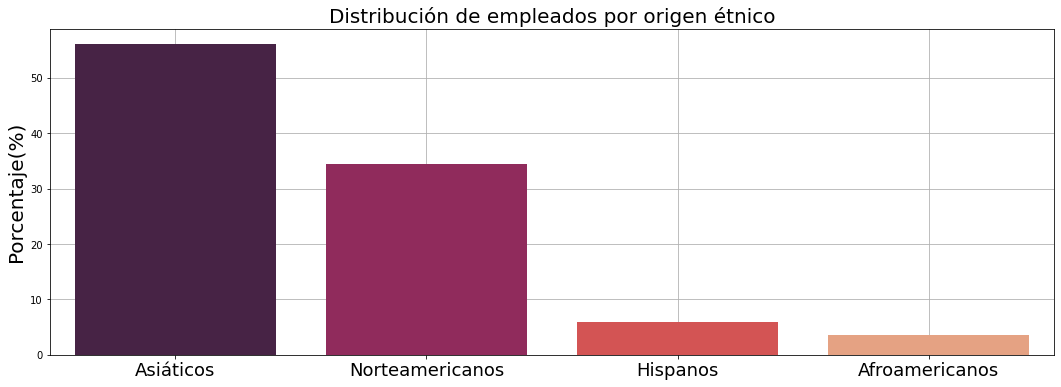

In [ ]:

#etnias=['Asiaticos','Hispanos','Norte-Americanos','Afroamericanos','Mestizos']
etnias=['Asiáticos','Norteamericanos','Hispanos','Afroamericanos']
fig, axs = plt.subplots(figsize = (18, 6))
sns.barplot(x=[i for i in range(len(total))],y=[i for i in total],palette=color,zorder=3)
axs.set_xticks([i for i in range(len(total))]) 
axs.set_xticklabels(etnias,rotation = 0,fontsize=tamaño_labels) 
axs.set_ylabel('Porcentaje(%)',fontsize=20)
axs.set_title('Distribución de empleados por origen étnico',fontsize=tamaño_titulo)
axs.grid(zorder=0.5)
#axs[1,2].set_title('Porcentaje total por compañia ')
fig2 =axs.get_figure()
fig2.savefig("Distribución de empleados por origen étnico.png")


Estudio la distribución etnica por compañia

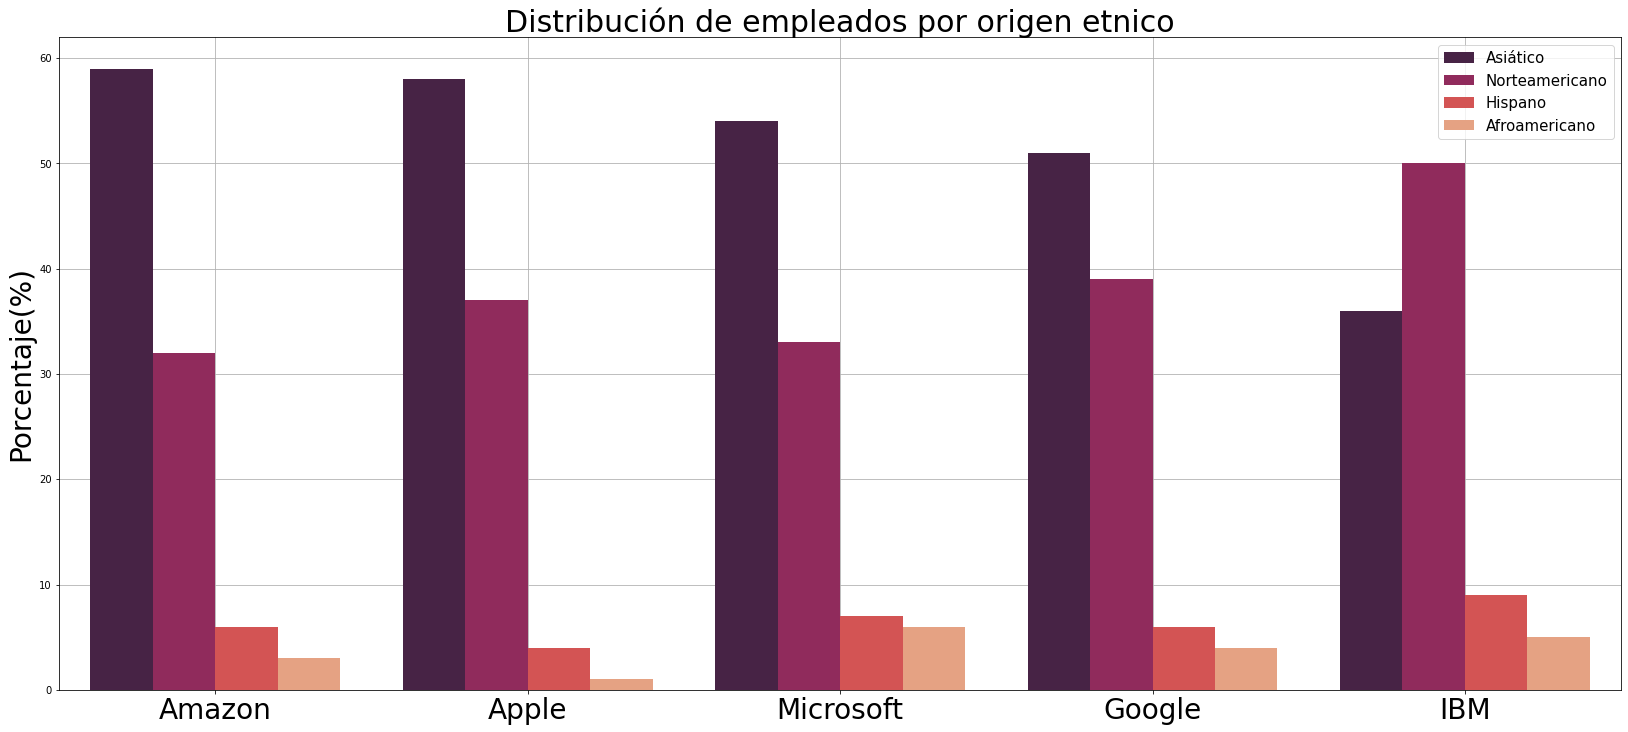

In [ ]:
fig, axs = plt.subplots(figsize = (28, 12))
sns.barplot(x='compañias', y='Porcentaje', hue='Etnia', data=df_per,zorder=3,palette='rocket')
axs.set_xticklabels(['Amazon','Apple','Microsoft','Google','IBM'],rotation = 0,fontsize=28) 
axs.set_title('Distribución de empleados por origen etnico',fontsize=30)
axs.set_xlabel('')
axs.set_ylabel('Porcentaje(%)',fontsize=28)
axs.legend(loc='upper right',fontsize=15)
axs.grid(zorder=0.5)
fig3 =axs.get_figure()
fig3.savefig("Distribución de empleados por origen étnico, por compañia.png")


Estudio la etnia por grupos salariales.

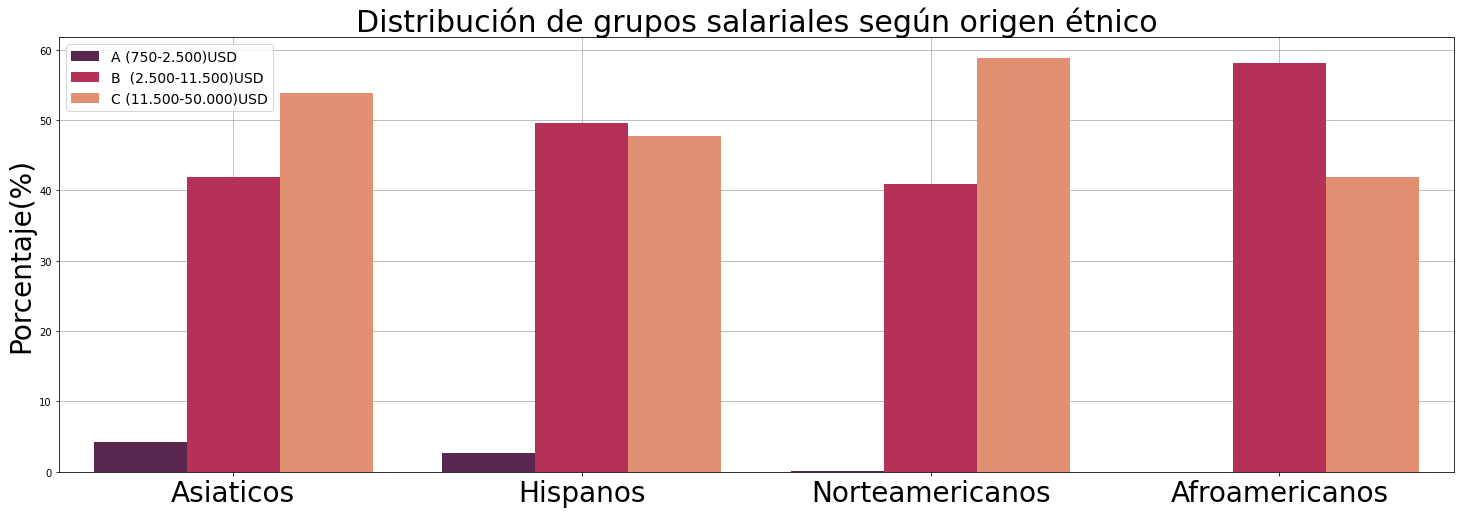

In [ ]:
fig, axs = plt.subplots(figsize = (25, 8))
sns.barplot(x='Etnia', y='Porcentaje', hue='Grupo salarial', data=df_sal,zorder=3,palette='rocket')
axs.set_xticklabels(['Asiaticos','Hispanos','Norteamericanos','Afroamericanos'],rotation = 0,fontsize=28) 
axs.set_title('Distribución de grupos salariales según origen étnico',fontsize=30)
axs.set_xlabel('')
axs.set_ylabel('Porcentaje(%)',fontsize=28)
axs.legend(loc='upper left',fontsize=tamaño_leyendas)
axs.grid(zorder=0.5)
fig4 =axs.get_figure()
fig4.savefig("Distribución por grupo salarial.png")


Mismo estudio para compañias especificas.

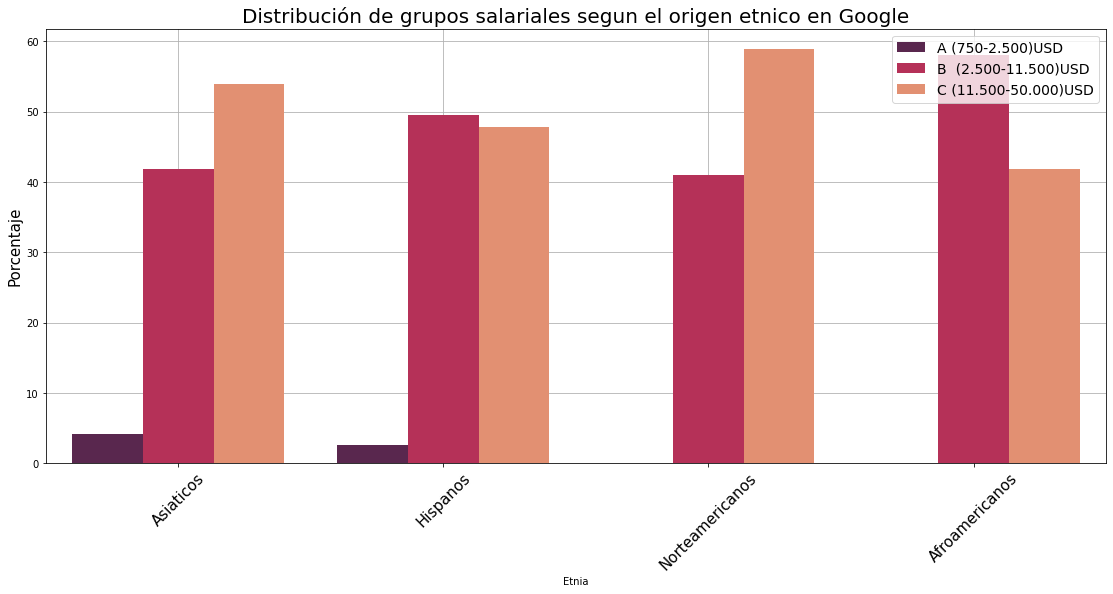

In [ ]:
fig, axs = plt.subplots(figsize = (19, 8))
sns.barplot(x='Etnia', y='Porcentaje', hue='Grupo salarial', data=df_sal2,zorder=3,palette='rocket')
axs.set_xticklabels(['Asiaticos','Hispanos','Norteamericanos','Afroamericanos'],rotation = 45,fontsize=tamaño_labels) 
axs.set_title('Distribución de grupos salariales segun el origen etnico en Google',fontsize=tamaño_titulo)
#axs.set_xlabel('')
axs.set_ylabel('Porcentaje',fontsize=tamaño_labels)
axs.legend(loc='upper right',fontsize=tamaño_leyendas)
axs.grid(zorder=0.5)

Analizo el sueldo en igualdad de condiciones por compañia.

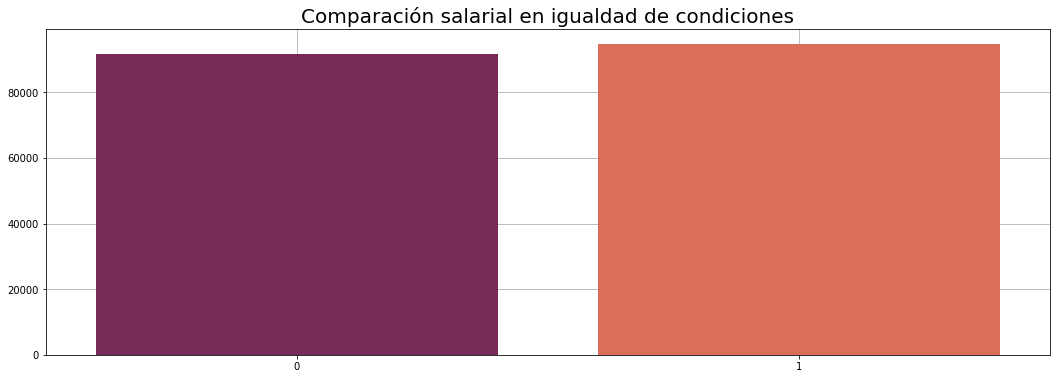

In [ ]:
#etnias=['Asiaticos','Norteamericanos','Hispanos','Afroamericanos']
fig, axs = plt.subplots(figsize = (18, 6))
sns.barplot(x=[i for i in range(len(percent_d))],y=[i for i in means],palette=color,zorder=3)
axs.set_xticks([i for i in range(len(percent_d))]) 
#axs.set_xticklabels(['Asiaticos','Norteamericanos','Hispanos'],rotation = 0,fontsize=tamaño_labels) 
axs.set_title('Comparación salarial en igualdad de condiciones',fontsize=tamaño_titulo)
axs.grid(zorder=0.5)

In [ ]:
years=1.0
grade="bachelor"
position='technical program manager'
companies=['amazon']

percent_d,means= equi(df_eth,[years],grade,position,companies)



print(percent_d)
print(means)



technical program manager    4
Name: title, dtype: int64
{'Asian': 50.0, 'White': 50.0}
[138500.0, 134000.0]


Gráfico general

In [ ]:

#Amazon
companiesam=[]
etam=[]
salaryam=[]
j=0
for i in percent_d:
  companiesam.append('Amazon')
  etam.append(i)
  salaryam.append(round(means[j]/12,0))
  j+=1

data_sam={'Salario':salaryam,'Etnia':etam,'compañia':companiesam}
print(data_sam)
df_salam=pd.DataFrame(data_sam)

{'Salario': [13958.0, 8750.0, 11250.0], 'Etnia': ['Asian', 'Black', 'White'], 'compañia': ['Amazon', 'Amazon', 'Amazon']}


In [ ]:
#Google
companiesg=[]
etg=[]
salaryg=[]
j=0
for i in percent_d:
  companiesg.append('Google')
  etg.append(i)
  salaryg.append(round(means[j]/12,0))
  j+=1

data_sg={'Salario':salaryg,'Etnia':etg,'compañia':companiesg}

df_salg=pd.DataFrame(data_sg)

print(df_salg)

   Salario  Etnia compañia
0  11111.0  Asian   Google
1   8458.0  White   Google


In [ ]:
#ApplE
companiesa=[]
eta=[]
salarya=[]
j=0
for i in percent_d:
  companiesa.append('Apple')
  eta.append(i)
  salarya.append(round(means[j]/12,0))
  j+=1

data_sa={'Salario':salarya,'Etnia':eta,'compañia':companiesa}

df_sala=pd.DataFrame(data_sa)
print(df_sala)

   Salario  Etnia compañia
0  17500.0  White    Apple
1  18333.0  Asian    Apple


In [ ]:
#IBM
companiesi=[]
eti=[]
salaryi=[]
j=0
for i in percent_d:
  companiesi.append('IBM')
  eti.append(i)
  salaryi.append(round(means[j]/12,0))
  j+=1

data_si={'Salario':salaryi,'Etnia':eti,'compañia':companiesi}

df_sali=pd.DataFrame(data_si)

In [ ]:
#Microsoft
companiesm=[]
etm=[]
salarym=[]
j=0
for i in percent_d:
  companiesm.append('Microsoft')
  etm.append(i)
  salarym.append(round(means[j]/12,0))
  j+=1

data_sm={'Salario':salarym,'Etnia':etm,'compañia':companiesm}

df_salm=pd.DataFrame(data_sm)
print(df_salm)

   Salario  Etnia   compañia
0  11542.0  Asian  Microsoft
1  11167.0  White  Microsoft


In [ ]:


finalDf = pd.concat([df_salg,df_salam,df_salm,df_sala,df_sali],ignore_index=True)

finalDf['Etnia']=finalDf['Etnia'].replace(to_replace=['Asian','White','Black','Hispanic'],value=['Asiático','Norteamericano','Afroamericano','Hispano'])
finalDf['Salario'].sort_values()
print(finalDf)

   Salario           Etnia   compañia
0  11111.0        Asiático     Google
1   8458.0  Norteamericano     Google
2  13958.0        Asiático     Amazon
3   8750.0   Afroamericano     Amazon
4  11250.0  Norteamericano     Amazon
5  11542.0        Asiático  Microsoft
6  11167.0  Norteamericano  Microsoft
7  17500.0  Norteamericano      Apple
8  18333.0        Asiático      Apple


Grafico para este caso para software engineer

NameError: ignored

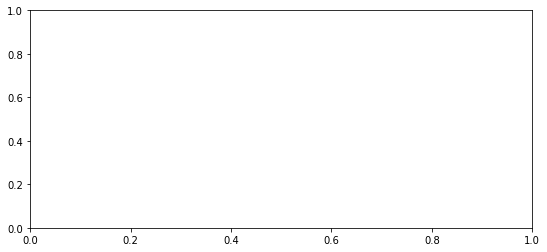

In [ ]:
labels=['Asiáticos','Norteamericanos','Hispanos','Afroamericanos']
fig, axs = plt.subplots(figsize = (9, 4))
sns.barplot(x='compañia', y='Salario', hue='Etnia', data=finalDf,zorder=3,palette='rocket')
axs.set_xticklabels(['Google','Amazon','Microsoft','Apple'],rotation =0,fontsize=tamaño_labels) 
axs.set_title('Comparación salarial bajo igualdad de condiciones ',fontsize=18)
axs.set_xlabel('')
axs.set_ylabel('Salario mensual(USD)',fontsize=tamaño_labels)
axs.legend(loc='upper center',fontsize=9)
axs.grid(zorder=0.5)
fig5 =axs.get_figure()
fig5.savefig("Comparación en igualdad de condiciones TPM.png")